In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.pylab import rcParams
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score 

data = pd.read_csv('shows.csv')
data2=data.copy()

d = {'UK': 0, 'USA': 1, 'N': 2}
data['Nationality'] = data['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
data['Go'] = data['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = data[features]
y = data['Go']



#print(data2)
print(data)


    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [60]:
model = KNeighborsClassifier(n_neighbors=4,weights='uniform')
model.fit(X, y)
print("Done Training")

Done Training


## Confusion Matrix

Prediction: [0 0 0 0 0 0 1 0 0 1 0 0 0]


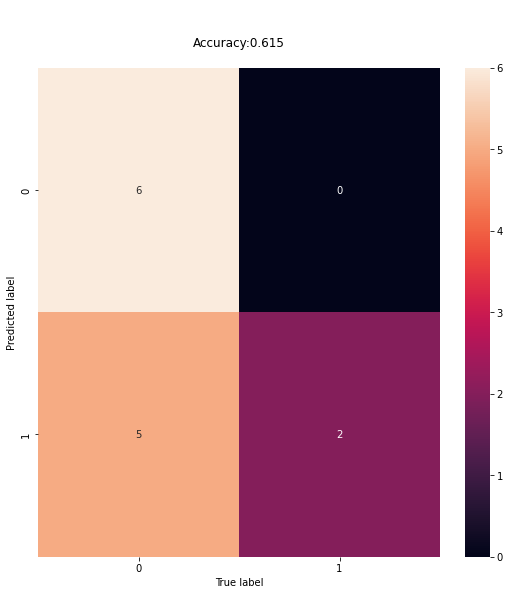

In [61]:
y_pred=model.predict(X)
print("Prediction:",y_pred)


cnf_matrix = metrics.confusion_matrix(y, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in range(0,2)], columns = [i for i in range(0,2)])
sns.heatmap(df_cm, annot=True)
plt.title(' \n \nAccuracy:{0:.3f}\n'.format(accuracy_score(y, y_pred)))
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()

## Decision Boundary

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


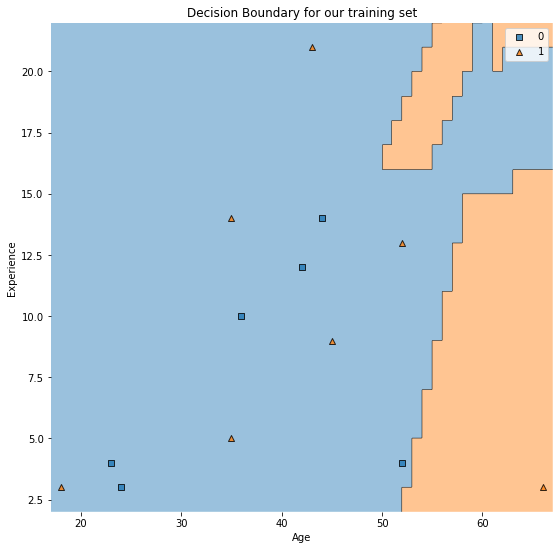

In [62]:
rcParams['figure.figsize'] = 9,9  # Reduce our dataset to two dimensions.
y = np.array(y,dtype='int')
X= np.array(X)
X_train_reduce=np.append(np.array(X[:,0:1]),np.array(X[:,1:2]), axis=1) # Reduce our dataset to two dimensions.
model=model.fit(X_train_reduce, y)
plot_decision_regions(X=X_train_reduce, y=y,clf=model, legend=2)
plt.xlabel('Age')
plt.ylabel('Experience')
plt.legend(loc="best")
plt.title('Decision Boundary for our training set')    
plt.show()

In [38]:
print('Report')
print('\n',classification_report(y, y_pred))

Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

